In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [3]:
from data_loading import load_data_using_sqlalchemy
from experience_analytics import (
    aggregate_experience_metrics,
    top_bottom_frequent_values,
    distribution_by_handset,
    perform_experience_clustering,
    describe_clusters
)

In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df =  load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


Successfully loaded the data


In [6]:
# Step 2: Aggregate experience metrics
experience_metrics = aggregate_experience_metrics(df)
print(experience_metrics.head())

   MSISDN/Number  Avg TCP Retrans (Bytes)  Avg RTT (ms)  \
0   3.360100e+10             1.685339e+07     46.000000   
1   3.360100e+10             1.685339e+07     30.000000   
2   3.360100e+10             1.685339e+07    119.182869   
3   3.360101e+10             1.066000e+03     69.000000   
4   3.360101e+10             9.349630e+06     57.000000   

   Avg Throughput (kbps)                    Handset Type  
0                   37.0  Huawei P20 Lite Huawei Nova 3E  
1                   48.0          Apple iPhone 7 (A1778)  
2                   48.0                       undefined  
3                  204.0         Apple iPhone 5S (A1457)  
4                20197.5         Apple iPhone Se (A1723)  


In [8]:
# Step 3: Top, bottom, and most frequent values
tcp_top, tcp_bottom, tcp_frequent = top_bottom_frequent_values(df, 'TCP DL Retrans. Vol (Bytes)')
rtt_top, rtt_bottom, rtt_frequent = top_bottom_frequent_values(df, 'Avg RTT DL (ms)')
throughput_top, throughput_bottom, throughput_frequent = top_bottom_frequent_values(df, 'Avg Bearer TP DL (kbps)')

print("\nTop 10 TCP Values:\n", tcp_top)
print("\nBottom 10 RTT Values:\n", rtt_bottom)
print("\nMost Frequent Throughput Values:\n", throughput_frequent)


Top 10 TCP Values:
            Bearer Id           Start  Start ms             End  End ms  \
77979   7.277826e+18  4/27/2019 2:55     378.0  4/28/2019 2:52    69.0   
135678  1.304243e+19  4/29/2019 0:07     411.0  4/30/2019 0:07   396.0   
34645   1.304243e+19  4/25/2019 0:09     100.0  4/26/2019 0:09    57.0   
140813  7.277826e+18  4/29/2019 3:44     807.0  4/30/2019 3:44   701.0   
3782    7.277826e+18  4/24/2019 4:42     318.0  4/25/2019 4:42   268.0   
119684  1.304243e+19  4/28/2019 3:11     319.0  4/29/2019 3:11   360.0   
39637   7.277826e+18  4/25/2019 3:33      22.0  4/26/2019 1:18   868.0   
76990   1.304243e+19  4/27/2019 1:34     550.0  4/28/2019 1:34   510.0   
59016   7.277826e+18  4/26/2019 1:25     313.0  4/27/2019 1:25   233.0   
41209   1.304243e+19  4/25/2019 4:28     900.0  4/26/2019 4:28   896.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
77979     86201.0  2.082017e+14   3.376211e+10  8.637690e+13   
135678    86399.0  2.082017e+14   3.

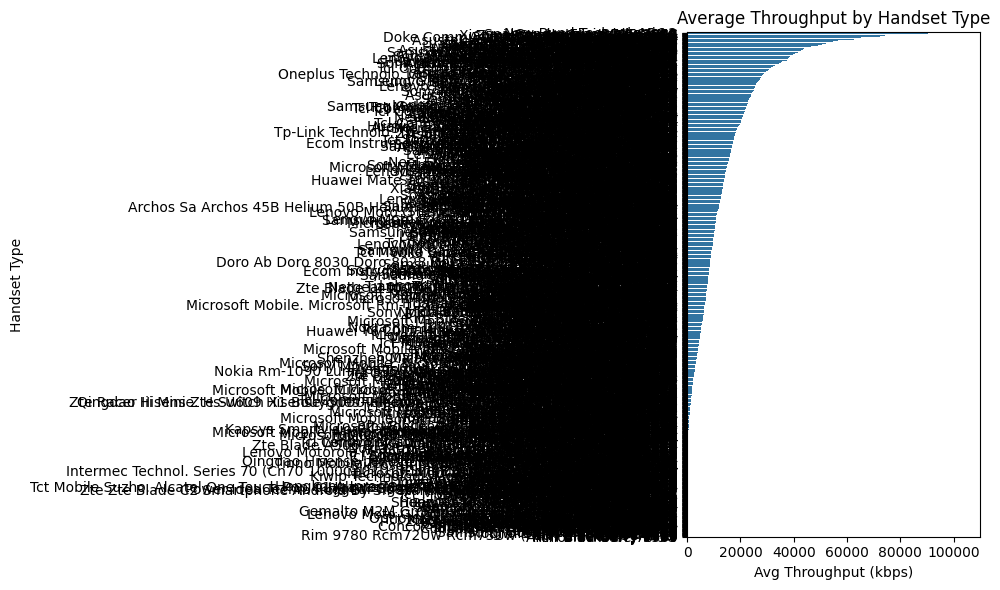

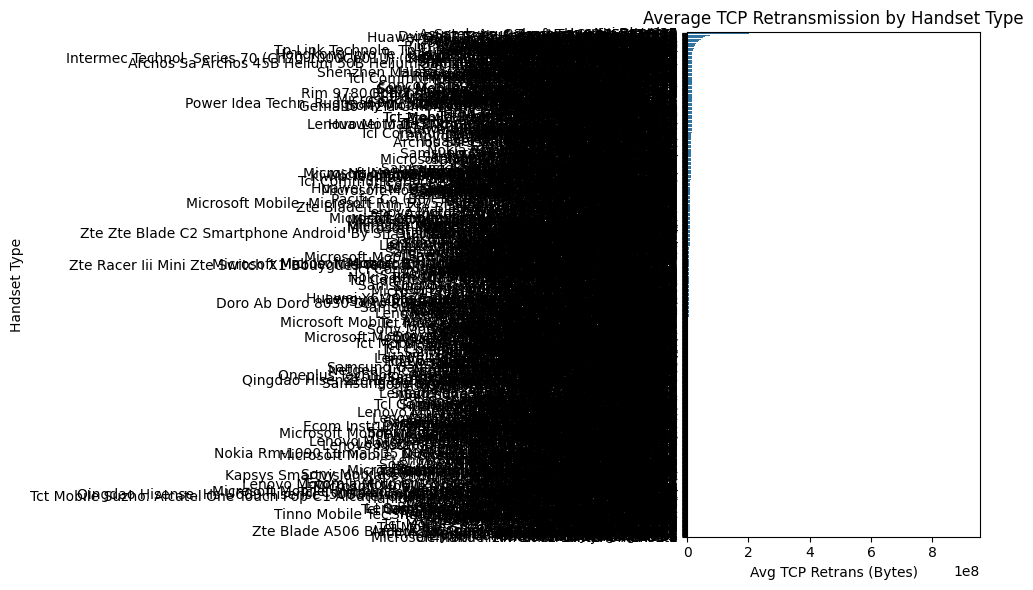

In [16]:
# Step 4: Distribution by handset type
throughput_distribution = distribution_by_handset(experience_metrics, 'Avg Throughput (kbps)', 'Average Throughput by Handset Type')
tcp_distribution = distribution_by_handset(experience_metrics, 'Avg TCP Retrans (Bytes)', 'Average TCP Retransmission by Handset Type')


In [17]:
# Step 5: Perform clustering on experience metrics
columns_to_cluster = ['Avg TCP Retrans (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']
experience_clustered, kmeans_model = perform_experience_clustering(experience_metrics, columns_to_cluster)

In [23]:
# Step 6: Describe clusters
cluster_descriptions = describe_clusters(experience_clustered, 'Experience Cluster')
print("\nCluster Descriptions:\n", cluster_descriptions)

TypeError: agg function failed [how->mean,dtype->object]